## The project

### "Al Amishkal"

#### Submissions- Naama Busquila, Tamar Sheinbach, Nofar Horowitz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

## The Dataset

In [2]:
mishkal_df = pd.read_csv('https://raw.githubusercontent.com/tamarsheinbach/AL_hamishkal/main/Al_hamishkal_OR.csv')
mishkal_df.head()

,customer_code,Name,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Ground_spices,Whole_spices,Seasoning_mixtures,...,Popsicle,Snacks,Difference,Packaging_93,Club,Spread,General,Isa_Marketing,Frozen_fruit,Natural_toiletries
0,1200842,NaN,NaN,1,22,22,29/06/2018 00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000073,אסתי אברהם ביסמוט,ירושלים,1,68,68,17/04/2019 00:00,NaN,NaN,NaN,...,NaN,NaN,-9.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN
2,110319,. .,NaN,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000000,AAAA,NaN,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121873,"DSIT פתרונות בע""מ",NaN,1,7,7,04/12/2020,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clearing and arranging the data

The file has a column of all the names of the club members. For privacy reasons we removed that column

In [3]:
mishkal_df.drop('Name',axis='columns',inplace=True)
mishkal_df.head()

,customer_code,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Ground_spices,Whole_spices,Seasoning_mixtures,Legumes,...,Popsicle,Snacks,Difference,Packaging_93,Club,Spread,General,Isa_Marketing,Frozen_fruit,Natural_toiletries
0,1200842,NaN,1,22,22,29/06/2018 00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000073,ירושלים,1,68,68,17/04/2019 00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,-9.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN
2,110319,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000000,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121873,NaN,1,7,7,04/12/2020,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check if there are missing values :

In [4]:
mishkal_df.isnull().sum().sort_values(ascending=False)

Nuts_are_ready                7867
Goat_milk                     7864
Natural_toiletries            7807
Isa_Marketing                 7699
Packaging_93                  7601
Caffe                         7510
Spread                        7452
Packaging                     7276
Popsicle                      7171
General                       7106
Frozen_fruit                  6986
Cakes_and_cookies             6966
Gift_packaging                6902
kitchenware                   6829
Gluten_free                   6724
Concentrators_and_essences    6652
Honey                         6564
Snacks                        6544
Drinks                        6482
Halva_and_special             5897
Tea_infusion                  5834
Seasoning_mixtures            5436
Sauces_and_jams               5404
Oil                           5347
Vitamins_and_supplements      5191
Whole_spices                  5151
Flour                         4946
Difference                    4922
Legumes             

Remove the rows with the missing values in the columns of 'Last_purchase_date' and 'City'-

In [5]:
mishkal_df.dropna(subset=['Last_purchase_date', 'City','Num_of_purchases'], inplace = True)

Fill all the missing values in 0, across all classes

In [6]:
mishkal_df.fillna('0',inplace = True)
mishkal_df.head()

,customer_code,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Ground_spices,Whole_spices,Seasoning_mixtures,Legumes,...,Popsicle,Snacks,Difference,Packaging_93,Club,Spread,General,Isa_Marketing,Frozen_fruit,Natural_toiletries
1,10000073,ירושלים,1,68,68,17/04/2019 00:00,0,0,0,0,...,0,0,-9.0,0,17.0,0,0,0,0,0
6,10000125,גבע בנימין,53,4088,77,22/04/2021 00:00,673.0,222.0,124.0,148.0,...,0,0,3.0,0,50.0,0,0,0,21.0,0
7,120512,גבעת שמואל,16,1439,90,25/03/2021 00:00,27.0,33.0,8.0,5.0,...,0,0,0,0,0,0,0,0,0,0
8,112244,עלי,1,57,57,16/07/2019 00:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,120075,גבעת שמואל,9,1470,163,04/09/2021,0,4.0,80.0,6.0,...,0,0,0,0,0,0,0,0,0,0


Extract only the date in the date column (remove time)

In [7]:
mishkal_df['Last_purchase_date'] = pd.to_datetime(mishkal_df['Last_purchase_date'])
mishkal_df.head()

,customer_code,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Ground_spices,Whole_spices,Seasoning_mixtures,Legumes,...,Popsicle,Snacks,Difference,Packaging_93,Club,Spread,General,Isa_Marketing,Frozen_fruit,Natural_toiletries
1,10000073,ירושלים,1,68,68,2019-04-17,0,0,0,0,...,0,0,-9.0,0,17.0,0,0,0,0,0
6,10000125,גבע בנימין,53,4088,77,2021-04-22,673.0,222.0,124.0,148.0,...,0,0,3.0,0,50.0,0,0,0,21.0,0
7,120512,גבעת שמואל,16,1439,90,2021-03-25,27.0,33.0,8.0,5.0,...,0,0,0,0,0,0,0,0,0,0
8,112244,עלי,1,57,57,2019-07-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,120075,גבעת שמואל,9,1470,163,2021-04-09,0,4.0,80.0,6.0,...,0,0,0,0,0,0,0,0,0,0


Define oldest last purchase date - 1.1.2019

Reset index counts

In [8]:
mishkal_df = mishkal_df[mishkal_df['Last_purchase_date']>'2019-01-01'].reset_index(drop=True)
mishkal_df.head()

,customer_code,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Ground_spices,Whole_spices,Seasoning_mixtures,Legumes,...,Popsicle,Snacks,Difference,Packaging_93,Club,Spread,General,Isa_Marketing,Frozen_fruit,Natural_toiletries
0,10000073,ירושלים,1,68,68,2019-04-17,0,0,0,0,...,0,0,-9.0,0,17.0,0,0,0,0,0
1,10000125,גבע בנימין,53,4088,77,2021-04-22,673.0,222.0,124.0,148.0,...,0,0,3.0,0,50.0,0,0,0,21.0,0
2,120512,גבעת שמואל,16,1439,90,2021-03-25,27.0,33.0,8.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,112244,עלי,1,57,57,2019-07-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120075,גבעת שמואל,9,1470,163,2021-04-09,0,4.0,80.0,6.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mishkal_df.loc[(mishkal_df.Num_of_purchases == 0)]
mishkal_df.drop(labels = 2164, inplace = True)
mishkal_df.loc[(mishkal_df.Num_of_purchases == 0)]

,customer_code,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Ground_spices,Whole_spices,Seasoning_mixtures,Legumes,...,Popsicle,Snacks,Difference,Packaging_93,Club,Spread,General,Isa_Marketing,Frozen_fruit,Natural_toiletries


### Data types
Check if any of the data types need to be fixed:

In [10]:
mishkal_df.dtypes

customer_code                          int64
City                                  object
Num_of_notes                           int64
Num_of_purchases                       int64
Average_purchase                       int64
Last_purchase_date            datetime64[ns]
Ground_spices                         object
Whole_spices                          object
Seasoning_mixtures                    object
Legumes                               object
Sauces_and_jams                       object
Oil                                   object
Flour                                 object
Baking_products                       object
Cakes_and_cookies                     object
Almonds_nuts_etc.                     object
Concentrators_and_essences            object
Nuts                                  object
Nuts_are_ready                        object
Dried_Fruit                           object
Dried_fruits_sugar_free               object
Natural_products                      object
Gluten_fre

Convert the columns of the products

In [11]:
mishkal_df.iloc[:,6:] = mishkal_df.iloc[:,6:].astype("int")

### Consolidate columns by groups

Spices :

In [12]:
mishkal_df['Spices'] = mishkal_df['Ground_spices'] + mishkal_df['Whole_spices'] + mishkal_df['Seasoning_mixtures']

Sauces and spreads :

In [13]:
mishkal_df['Sauces_and_spreads'] = mishkal_df['Sauces_and_jams'] + mishkal_df['Concentrators_and_essences'] + mishkal_df['Honey'] + mishkal_df['Spread']

Nuts :

In [14]:
mishkal_df['Nuts'] = mishkal_df['Nuts'] + mishkal_df['Nuts_are_ready'] 

Sweets :

In [15]:
mishkal_df['Sweets'] = mishkal_df['Popsicle'] + mishkal_df['Snacks'] + mishkal_df['Halva_and_special'] + mishkal_df['Candeis'] + mishkal_df['Drinks'] + mishkal_df['Cakes_and_cookies']

Natural products :

In [16]:
mishkal_df['Natural_products'] = mishkal_df['Natural_products'] + mishkal_df['Natural_toiletries']

Difference :

In [17]:
mishkal_df['Difference'] = mishkal_df['Difference'] + mishkal_df['kitchenware'] + mishkal_df['Isa_Marketing'] + mishkal_df['Products_without_VAT'] + mishkal_df['Gift_packaging'] + mishkal_df['Packaging_93'] + mishkal_df['Packaging'] + mishkal_df['General'] + mishkal_df['Goat_milk']

Remove duplicate columns

In [18]:
mishkal_df.drop(columns= ['Goat_milk','Packaging_93','General','Packaging','Gift_packaging','Products_without_VAT','Isa_Marketing','kitchenware','Natural_toiletries','Cakes_and_cookies','Drinks','Candeis','Halva_and_special','Snacks','Popsicle','Nuts_are_ready','Spread','Honey','Concentrators_and_essences','Sauces_and_jams','Seasoning_mixtures','Whole_spices','Ground_spices'], inplace = True)

#### Checking the data after we removed and arranged

In [19]:
mishkal_df.head()

,customer_code,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Legumes,Oil,Flour,Baking_products,...,Gluten_free,Vitamins_and_supplements,Tea_infusion,Caffe,Difference,Club,Frozen_fruit,Spices,Sauces_and_spreads,Sweets
0,10000073,ירושלים,1,68,68,2019-04-17,0,0,0,0,...,0,0,0,0,-9,17,0,0,0,0
1,10000125,גבע בנימין,53,4088,77,2021-04-22,148,287,133,164,...,0,106,0,0,198,50,21,1019,59,70
2,120512,גבעת שמואל,16,1439,90,2021-03-25,5,0,0,0,...,0,323,13,0,17,0,0,68,0,20
3,112244,עלי,1,57,57,2019-07-16,0,0,0,0,...,0,0,0,0,35,0,0,0,0,0
4,120075,גבעת שמואל,9,1470,163,2021-04-09,6,0,0,0,...,0,162,0,0,51,0,0,84,0,70


In [20]:
mishkal_df.columns

Index(['customer_code', 'City', 'Num_of_notes', 'Num_of_purchases',
       'Average_purchase', 'Last_purchase_date', 'Legumes', 'Oil', 'Flour',
       'Baking_products', 'Almonds_nuts_etc.', 'Nuts', 'Dried_Fruit',
       'Dried_fruits_sugar_free', 'Natural_products', 'Gluten_free',
       'Vitamins_and_supplements', 'Tea_infusion', 'Caffe', 'Difference',
       'Club', 'Frozen_fruit', 'Spices', 'Sauces_and_spreads', 'Sweets'],
      dtype='object')

In [21]:
mishkal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4385 entries, 0 to 4385
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_code             4385 non-null   int64         
 1   City                      4385 non-null   object        
 2   Num_of_notes              4385 non-null   int64         
 3   Num_of_purchases          4385 non-null   int64         
 4   Average_purchase          4385 non-null   int64         
 5   Last_purchase_date        4385 non-null   datetime64[ns]
 6   Legumes                   4385 non-null   int32         
 7   Oil                       4385 non-null   int32         
 8   Flour                     4385 non-null   int32         
 9   Baking_products           4385 non-null   int32         
 10  Almonds_nuts_etc.         4385 non-null   int32         
 11  Nuts                      4385 non-null   int32         
 12  Dried_Fruit         

## 2. Understanding the data

<!-- A list is made of all the cities. We will take the 11 cities with the most customers and present them in Pai Plot -->
Define parameter to show all the customeres by city

In [22]:
list_city = mishkal_df['City'].value_counts()
list_city[0:20]

גבעת שמואל      795
קרני שומרון     425
בית אל          354
קדומים          288
עפרה            236
כוכב השחר       202
כוכב יעקב       194
גבע בנימין      193
פסגות           164
מעלה מכמש       150
עלי             111
שילה             84
תל ציון          79
עופרה            67
שבי שומרון       57
מעלה שומרון      57
עמנואל           55
יקיר             43
ירושלים          42
גינות שומרון     42
Name: City, dtype: int64

Show all the cities that have more then 100 customeres

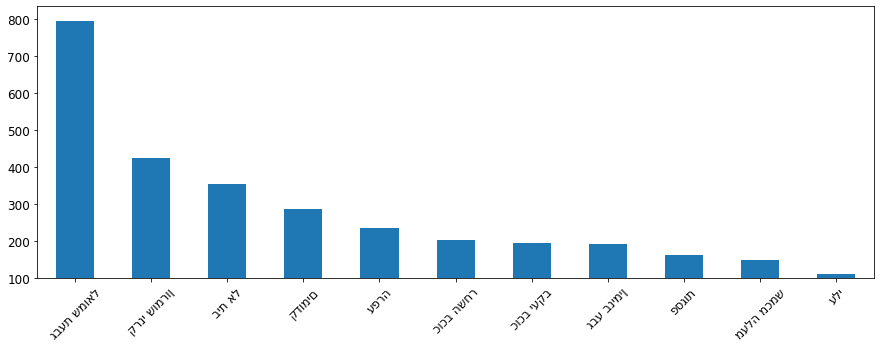

In [134]:
list_city = list_city.iloc[:11]
# list_city.plot.pie(fontsize = 12, rotatelabels = False, pctdistance = 0.8, autopct='%1.1f%%',figsize=(15,8))
list_city.plot.bar(fontsize = 12, rot = 45, ylim = 100, figsize = (15,5))
plt.legend().remove()

### Correlation 1 - comparse between two cities that have similar properties

<!-- We will create a piece from the original file where the customers from these 2 localities will be. -->

In [24]:
two_city = mishkal_df.loc[(mishkal_df.City == 'קרני שומרון') | (mishkal_df.City == 'בית אל')]

Check number of customers from Beit El and Karnei Shomron :

In [25]:
two_city.groupby('City')['City'].count()

City
בית אל         354
קרני שומרון    425
Name: City, dtype: int64

We will create a pivot table with the 3 concluding columns

In [26]:
two_city.pivot_table(['Num_of_notes','Num_of_purchases','Average_purchase'],'City').round(2)

,Average_purchase,Num_of_notes,Num_of_purchases
City,,,
בית אל,110.83,50.81,5740.90
קרני שומרון,78.24,89.42,7285.02


We will see the distribution of the data by histogram

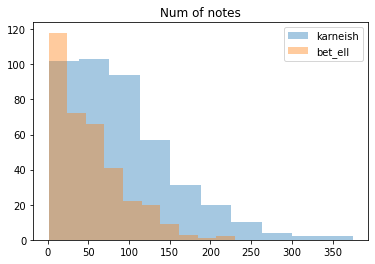

In [27]:
karnsh = two_city.loc[two_city.City == 'קרני שומרון']
bet_ell = two_city.loc[two_city.City == 'בית אל']
plt.title('Num of notes')
plt.hist(karnsh['Num_of_notes'], alpha=0.4, label='karneish')
plt.hist(bet_ell['Num_of_notes'], alpha=0.4, label='bet_ell')
plt.legend(loc='upper right')

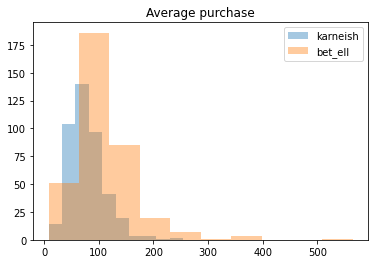

In [28]:
plt.title('Average purchase')
plt.hist(karnsh['Average_purchase'], alpha=0.4, label='karneish')
plt.hist(bet_ell['Average_purchase'], alpha=0.4, label='bet_ell')
plt.legend(loc='upper right')

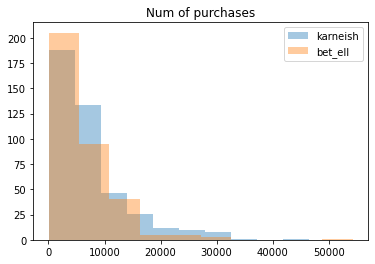

In [29]:
plt.title('Num of purchases')
plt.hist(karnsh['Num_of_purchases'], alpha=0.4, label='karneish')
plt.hist(bet_ell['Num_of_purchases'], alpha=0.4, label='bet_ell')
plt.legend(loc='upper right')

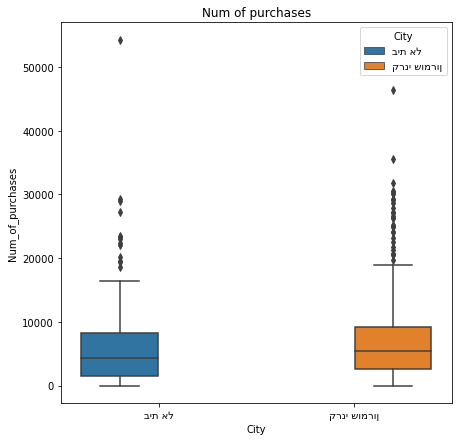

In [30]:
plt.figure(figsize=(7,7))
plt.title('Num of purchases')
ax = sns.boxplot(x='City', y='Num_of_purchases', data=two_city, hue = 'City')
# ax.set(ylim = (0,30000))

We will examine correlations in the 2 localities between these 3 columns-

In [31]:
corr1 = two_city[['Num_of_notes','Num_of_purchases','Average_purchase']]
corr1.corr().round(3)

,Num_of_notes,Num_of_purchases,Average_purchase
Num_of_notes,1.000,0.825,-0.036
Num_of_purchases,0.825,1.000,0.375
Average_purchase,-0.036,0.375,1.000


<AxesSubplot:xlabel='Average_purchase', ylabel='Num_of_notes'>

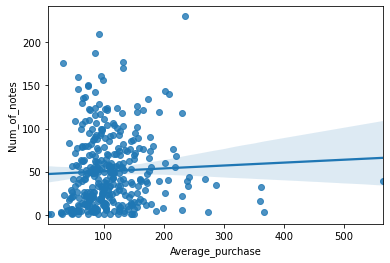

In [55]:
sns.regplot(x='Average_purchase', y='Num_of_notes', data = corr3)

<AxesSubplot:title={'center':'purchases'}>

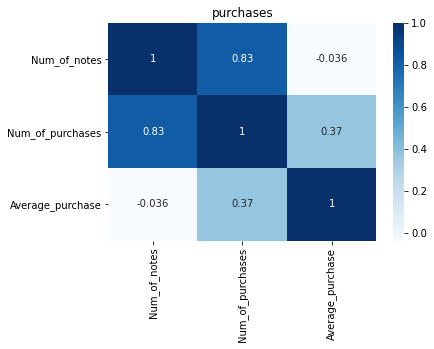

In [33]:
plt.title("purchases")
sns.heatmap(corr1.corr(),cmap='Blues', annot=True)

### Correlation 2 - comparse between products groups
<!-- Display in Pie Plot the average of the product columns- -->

In [34]:
# plt.title("Departments")
# mishkalGroup = mishkal_df.iloc[:,6:].mean()
# mishkalGroup.plot.pie(fontsize = 12, rotatelabels = False, pctdistance = 0.8, autopct='%1.1f%%', figsize = (15,8))

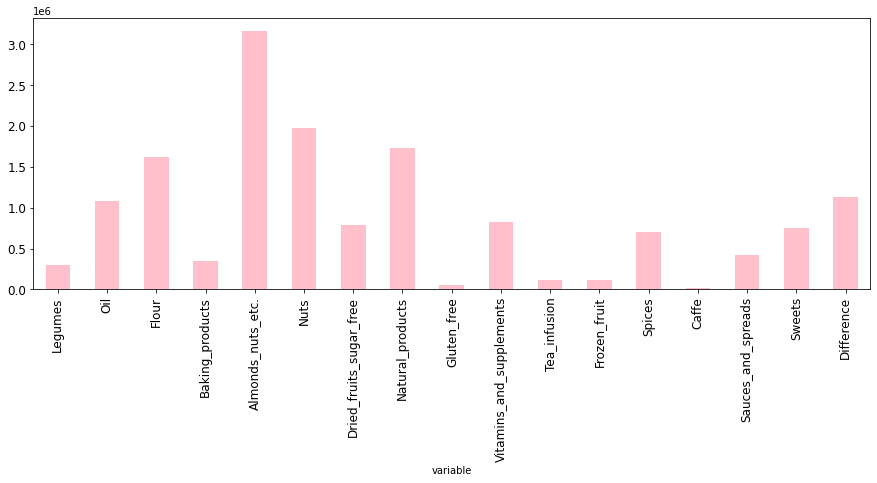

In [94]:
Departments = mishkal_df[['Legumes','Oil','Flour','Baking_products', 'Almonds_nuts_etc.','Nuts','Dried_fruits_sugar_free','Natural_products','Gluten_free','Vitamins_and_supplements','Tea_infusion','Frozen_fruit','Spices','Caffe','Sauces_and_spreads','Sweets','Difference']].sum()
Departments = pd.DataFrame([Departments])
ax = pd.melt(Departments).plot.bar(x = 'variable', fontsize = 12, rot = 90, figsize = (15,5), color = ['Pink'])
plt.legend().remove()

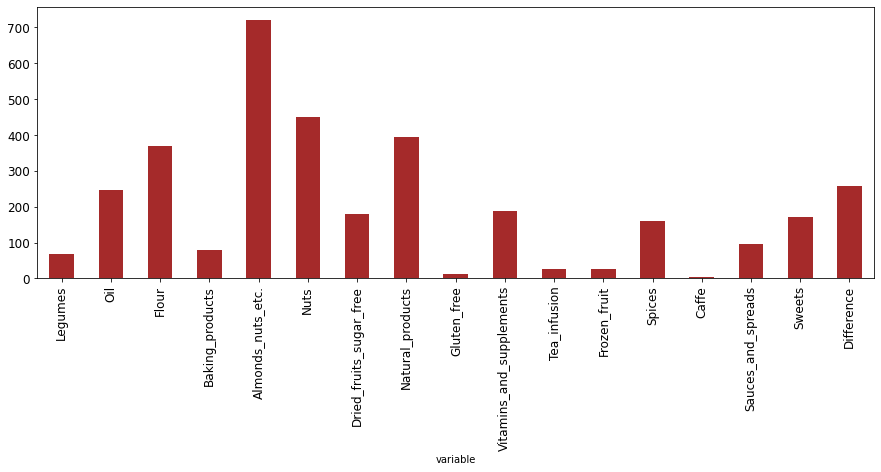

In [93]:
Departments1 = mishkal_df[['Legumes','Oil','Flour','Baking_products', 'Almonds_nuts_etc.','Nuts','Dried_fruits_sugar_free','Natural_products','Gluten_free','Vitamins_and_supplements','Tea_infusion','Frozen_fruit','Spices','Caffe','Sauces_and_spreads','Sweets','Difference']].mean()
Departments1 = pd.DataFrame([Departments1])
ax1 = pd.melt(Departments1).plot.bar(x = 'variable', fontsize = 12, rot = 90, figsize = (15,5), color = ['Brown'])
plt.legend().remove()

Define 3 new groups - 'basic_products' , 'not_healthy' , 'healthy'
<!-- Introducing different types of products into 3 new columns- 'basic_products' , 'not_healthy' , 'healthy' -->

In [36]:
healthy = mishkal_df.loc[:,['Almonds_nuts_etc.','Dried_fruits_sugar_free','Natural_products']]
not_healthy = mishkal_df.loc[:,['Nuts','Sweets','Dried_Fruit','Baking_products']]
basic_products = mishkal_df.loc[:,['Legumes', 'Oil', 'Flour','Spices']]

Insert the new columns into the file

In [37]:
mishkal_df['healthy'] = healthy.mean(axis=1)
mishkal_df['not_healthy'] = not_healthy.mean(axis=1)
mishkal_df['basic_products'] = basic_products.mean(axis=1)

Checking the correlation between the new groups and another the group 'Vitamins_and_supplements'

In [38]:
corr2 = mishkal_df[['basic_products','not_healthy','healthy','Vitamins_and_supplements']]
corr2.corr().round(2)

,basic_products,not_healthy,healthy,Vitamins_and_supplements
basic_products,1.00,0.44,0.62,0.29
not_healthy,0.44,1.00,0.64,0.32
healthy,0.62,0.64,1.00,0.38
Vitamins_and_supplements,0.29,0.32,0.38,1.00


Showing the correlation in heatmap

<AxesSubplot:>

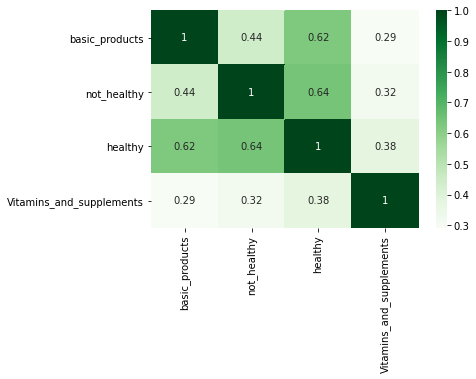

In [39]:
sns.heatmap(corr2.corr(),cmap='Greens', annot=True)

### Correlation 3

Givat Shmuel is the city with the most customers. We will now focus on her :

In [128]:
gabash = mishkal_df.loc[mishkal_df.City == 'גבעת שמואל']
gabash.head()

,customer_code,City,Num_of_notes,Num_of_purchases,Average_purchase,Last_purchase_date,Legumes,Oil,Flour,Baking_products,...,Caffe,Difference,Club,Frozen_fruit,Spices,Sauces_and_spreads,Sweets,healthy,not_healthy,basic_products
2,120512,גבעת שמואל,16,1439,90,2021-03-25,5,0,0,0,...,0,17,0,0,68,0,20,252.000000,12.25,18.25
4,120075,גבעת שמואל,9,1470,163,2021-04-09,6,0,0,0,...,0,51,0,0,84,0,70,242.666667,57.75,22.50
7,10000557,גבעת שמואל,1,50,50,2020-01-24,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,10.50,0.00
28,121422,גבעת שמואל,1,22,22,2019-02-15,0,0,0,5,...,0,0,0,0,0,0,14,0.000000,4.75,0.00
29,120668,גבעת שמואל,3,284,95,2021-03-26,0,0,0,0,...,0,71,17,0,0,32,0,32.666667,6.00,0.00


A comparison is made with Givat Shmuel customers between consuming healthy products and unhealthy products.

In [41]:
healthy_y_n = gabash[['not_healthy','healthy']]
mean_y_n = healthy_y_n.mean()
mean_y_n

not_healthy    23.753774
healthy        79.293501
dtype: float64

We can see that there is a big gap between the consumption of healthy and unhealthy products. Givat Shmuel residents buy more healthy products -

<AxesSubplot:title={'center':'healthy vs. not healthy'}>

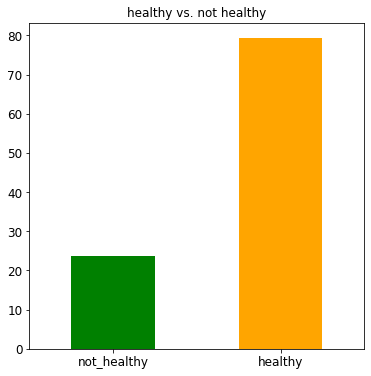

In [114]:
plt.title("healthy vs. not healthy")
mean_y_n.plot.bar(fontsize = 12, rot = 0, color = ['Green','Orange'], figsize = (6,6))

In [52]:
gabash_df = gabash[['basic_products','not_healthy','healthy','Vitamins_and_supplements']]
gabash_df.corr().round(2)

,basic_products,not_healthy,healthy,Vitamins_and_supplements
basic_products,1.00,0.35,0.49,0.18
not_healthy,0.35,1.00,0.54,0.17
healthy,0.49,0.54,1.00,0.25
Vitamins_and_supplements,0.18,0.17,0.25,1.00


<AxesSubplot:>

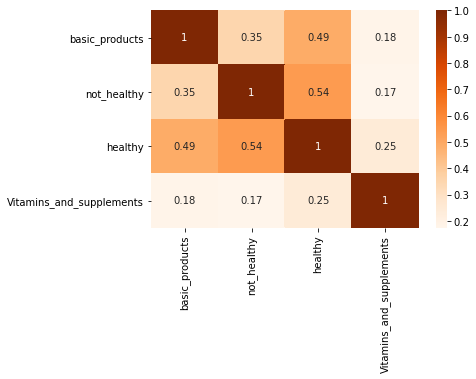

In [53]:
sns.heatmap(gabash_df.corr(),cmap='Oranges', annot=True)

## Building a model from the data

#### We will try to predict Is a customer from Beit El or Karnei Shomron?
Another view of the 2 cities file for the new columns to be added to it

In [43]:
gabash = mishkal_df.loc[mishkal_df.City == 'גבעת שמואל']

Preparing the data for learning

In [44]:
features = ['Num_of_notes','Average_purchase','healthy','not_healthy','basic_products']
X = gabash[features]
y = gabash["Vitamins_and_supplements"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,Num_of_notes,Average_purchase,healthy,not_healthy,basic_products
995,4,76,25.000000,9.75,9.75
2307,8,41,22.000000,0.00,0.00
1920,6,132,91.666667,7.50,85.50
617,1,136,0.000000,7.00,0.00
2497,6,66,20.000000,5.00,5.75


In [45]:
y_test.head()

39      264
3026      0
1004      0
3837      0
3126      0
Name: Vitamins_and_supplements, dtype: int32

Build the model with max depth 5-

In [46]:
model = DecisionTreeRegressor(max_depth=5, random_state=22)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=22)

Prediction

In [47]:
mishkal_df_pred = model.predict(X_test)
mse(mishkal_df_pred,y_test,squared=False)

179.2924421755512

We will try to rebuild the model with different depth max to find higher accuracy

In [48]:
model = DecisionTreeRegressor(max_depth=3, random_state=22)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=22)

In [49]:
mishkal_df_pred = model.predict(X_test)
mse(mishkal_df_pred,y_test,squared=False)

160.7493373740872

It can be seen that at depth 3 the accuracy is higher

##### Plot the tree
Write a function that plots the tree and the tree presentation-

In [50]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   class_names = model.classes_,
                   filled=True,
                  fontsize=15)  
    plt.show()
plot_tree(model,X_test.columns,size=(30,20))

AttributeError: 'DecisionTreeRegressor' object has no attribute 'classes_'

<Figure size 2160x1440 with 0 Axes>